### 4차시: 이미지 핸들링을 이용한 인식률 높이기
- 이미지 자르기, 회전하기를 이용하여 인식률을 높여봅니다
- 왜 이미지를 자르고 회전하면 인식률이 올라가는지 그 이유를 알아봅니다

### ***YOLO 모델의 입력 이미지 크기***
- 우리는 MNIST 모델에 우리의 손글씨를 입력으로 사용할 때 28x28으로 리사이징 했습니다
- YOLO에서는 모델에 따라 대개 416x416 또는 608x608을 사용합니다
  - 대개라는 말은 우리가 이를 수정할 수 있음을 의미합니다
  - 그러나 우리는 기존에 학습된 모델을 사용하기 때문에 그 모델의 학습과정에서 사용한 입력 크기를 사용해야 합니다
  - 그 입력 크기가 416x416, 608x608 또는 640x640 입니다

### ***YOLOv8n모델의 입력 크기 확인하기***
- https://docs.ultralytics.com/ko/models/yolov8/#performance-metrics 에서 확인합니다
- 640x640 임을 확인할 수 있습니다

### ***인식 대상 이미지 크기 확인하기***
- shape은 각 차원 성분의 크기를 의미합니다
- [행 렬] 이기 때문에 행 성분이 먼저 나오고 이어서 열 성분이 나옵니다
- 마지막으로 색상 성분입니다
- 3차시에 인식했던 이미지는 가로 640, 세로 406의 컬러 이미지 입니다


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


filename = r"coco128\images\train2017\000000000488.jpg"

img = cv2.imread(filename)
img.shape



### ***640x406 이미지를 640x640으로 리사이징할 때 발생하는 일***
- 세로 성분 406픽셀이 640으로 늘어납니다
- 이 때 640 - 406 = 234픽셀의 정보는 어떻게 만들어질까요?
  - 보간법으로 만들어집니다
  - 예를 들면 두 픽셀 사이의 평균값으로 채우는 것입니다
  - 이미지를 크게 늘리면 계단현상이라는 것이 생기는 이유입니다
  - 즉, 불완전한 정보로 채워진다는 것을 의미합니다
  - 이미지를 과하게 작게 자르면 이 보간법에 의해 이미지가 왜곡되는 일이 발생함에 유의합시다

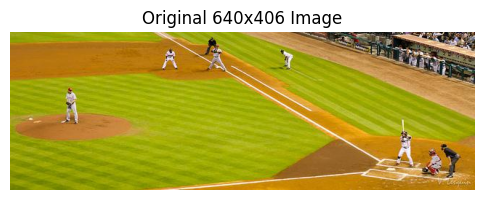

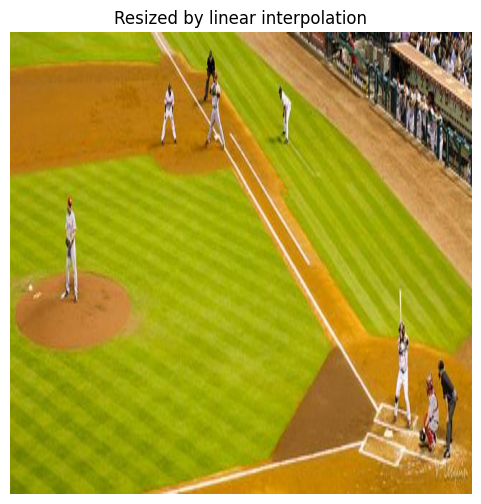

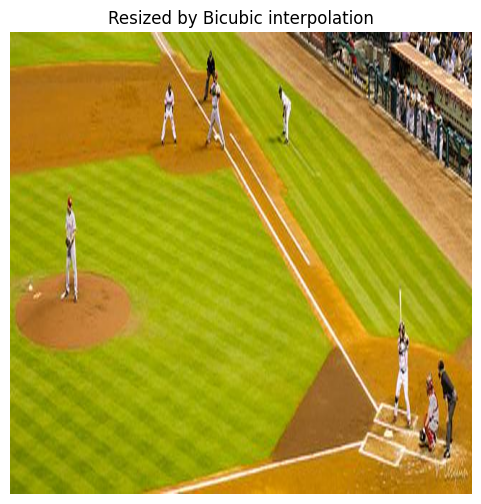

In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = r"coco128\images\train2017\000000000357.jpg"

img = cv2.imread(filename)
h, w, c = img.shape

img_org = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 4))
plt.title("Original 640x406 Image")
plt.imshow(img_org)
plt.axis("off")
plt.show()

# 선형 보간법에 의한 리사이징
img_resized = cv2.resize(img, (640, 640), interpolation=cv2.INTER_LINEAR)

img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.title("Resized by linear interpolation")
plt.imshow(img_resized)
plt.axis("off")
plt.show()

# Bicubic 보간법에 의한 리사이징
img_resized_cubic = cv2.resize(img, (640, 640), interpolation=cv2.INTER_CUBIC)

img_resized_cubic = cv2.cvtColor(img_resized_cubic, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.title("Resized by Bicubic interpolation")
plt.imshow(img_resized_cubic)
plt.axis("off")
plt.show()


### ***이미지 자르기를 이용해 인식되지 않은 사람 인식시켜보기***
- 이미짐는 행렬이기 때문에 행렬을 부분적으로 취하면 이미지를 자르는 것이 됩니다
- 아래 코드에서 left, top, right, bottom를 변경하면서 이미지를 잘라봅시다
- 그러면 행 성분은 top부터 bottom까지, 열 성분은 left부터 right까지 부분행렬을 가져옵니다
- 인식되지 않은 사람이 크게 나오도록 이미지를 잘라봅시다

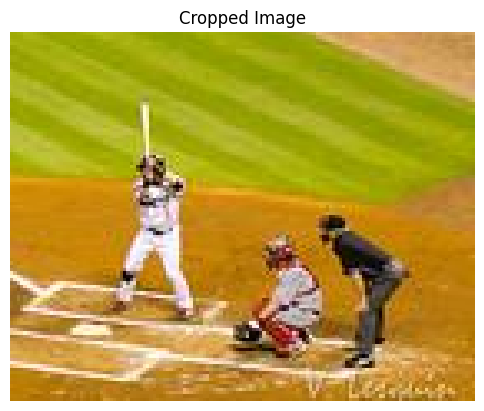

In [146]:
import cv2
import matplotlib.pyplot as plt

# 이 부분을 변경하면서 이미지를 잘라봅니다
left, top, right, bottom = 500, 100, 640, 211

filename = r"coco128\images\train2017\000000000357.jpg"
img = cv2.imread(filename)
h, w, c = img.shape

# 행 성분은 top부터 bottom까지, 열 성분은 left부터 right까지 부분행렬을 가져옵니다
# 이미지를 행렬이기 때문에 이것이 이미지를 자르는 것이 됩니다
cropped_img = img[top:bottom, left:right]

cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(cropped_img)
plt.title("Cropped Image")
plt.axis("off")
plt.show()


### ***자른 이미지로 인식 시키기***
- 원본 이미지에서는 인식하지 못했던 야구방망이 이미지가 어떻게 인식 되는지 확인해봅시다


0: 512x640 3 persons, 1 baseball bat, 447.4ms
Speed: 5.8ms preprocess, 447.4ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


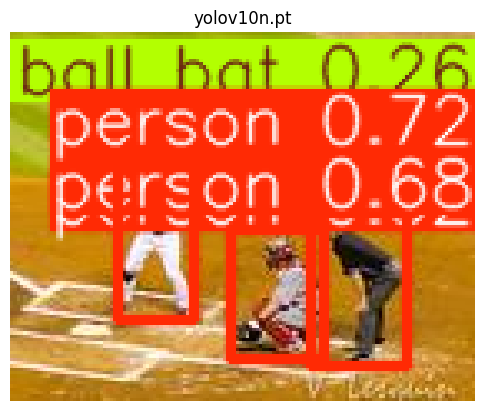

In [148]:
weight = "yolov10n.pt"

model = YOLO("yolov10n.pt")     # 모델 불러오기
results = model(cropped_img)    # 추론

# 결과 시각화
res_plotted = results[0].plot()  # 결과 그리기
plt.figure(figsize=(6, 6))
plt.imshow(res_plotted)
plt.axis("off")
plt.title(weight)
plt.show()

### ***결과 생각해보기***
- 이미지를 부분적으로 자르면서 인식되지 않았던 작은 객체의 크기는 커졌습니다
- 이로 인해 일부 인식이 되기도 했지만 잘못된 객체로 인식되기도 했습니다
- 보간법에 의해 만들어진 정보가 노이즈로 작용한 것입니다

### ***이미지 회전시키기***
- 이제부터 수학시간에 배운 회전행렬을 활용할 것입니다

\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}

- 아래에 테디베어가 dog로 인식된 것을 이미지 회전을 통해 바로 잡아봅니다



0: 640x640 2 dogs, 682.5ms
Speed: 8.7ms preprocess, 682.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


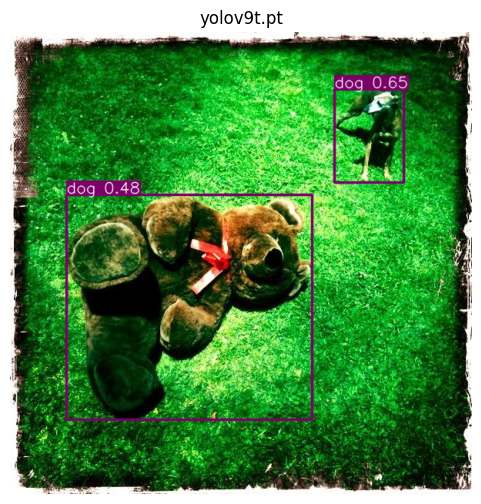

In [160]:
filename = r"coco128\images\train2017\000000000309.jpg"
img = cv2.imread(filename)
h, w, c = img.shape

weight = "yolov9t.pt"

model = YOLO(weight)        # 모델 불러오기
results = model(img)    # 인식하기

# 결과 시각화
res_plotted = results[0].plot()
res_plotted = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(res_plotted)
plt.axis("off")
plt.title(weight)
plt.show()

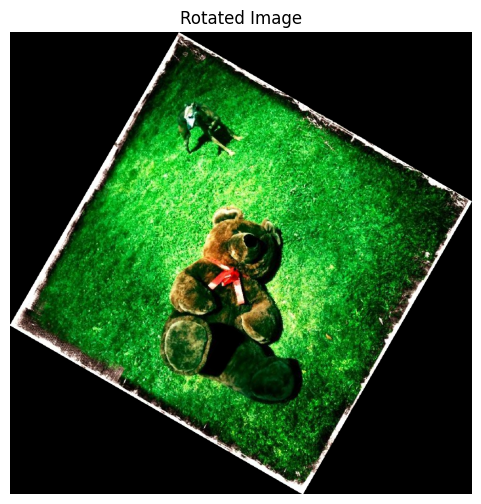

In [162]:
import numpy as np

# 각도를 다양하게 변화시켜봅니다

angle_deg = -60

filename = r"coco128\images\train2017\000000000309.jpg"
img = cv2.imread(filename)
h, w, c = img.shape

angle_rad = np.deg2rad(angle_deg)


# 회전행렬
R = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad), np.cos(angle_rad)]
])

cos_theta = R[0][0]
sin_theta = R[1][0]

# Calculate new image dimensions
new_w = int(abs(w * cos_theta) + abs(h * sin_theta))
new_h = int(abs(h * cos_theta) + abs(w * sin_theta))

# Center offsets
ox, oy = w / 2, h / 2
nx, ny = new_w / 2, new_h / 2

# Prepare empty output image
rotated_img = np.zeros((new_h, new_w, c), dtype=img.dtype)

# Iterate over each pixel in the output
for y in range(new_h):
    for x in range(new_w):
        # Transform back to original image coordinates
        tx = (x - nx) * cos_theta + (y - ny) * sin_theta + ox
        ty = -(x - nx) * sin_theta + (y - ny) * cos_theta + oy

        tx_int = int(round(tx))
        ty_int = int(round(ty))

        # If inside original image, copy pixel
        if 0 <= tx_int < w and 0 <= ty_int < h:
            rotated_img[y, x] = img[ty_int, tx_int]

rotated_img = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(rotated_img)
plt.title("Rotated Image")
plt.axis("off")
plt.show()


### ***회전시킨 이미지의 인식***
- 60도 회전시킨 후 다시 인식을 해보면 테디베어로 정상 인식되는 것을 확인할 수 있습니다


0: 640x640 1 dog, 1 teddy bear, 868.2ms
Speed: 9.9ms preprocess, 868.2ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


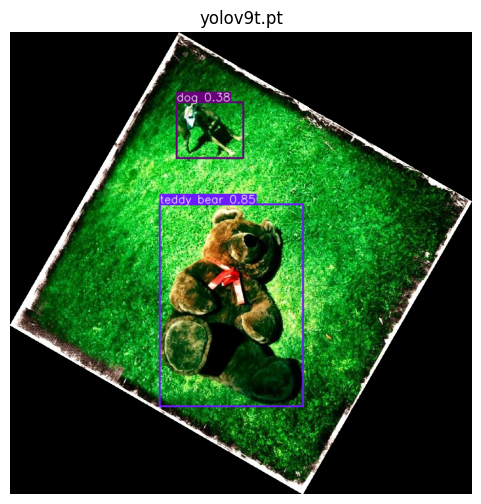

In [164]:
model = YOLO(weight)        # 모델 불러오기
results = model(rotated_img)    # 인식하기

# 결과 시각화
res_plotted = results[0].plot()
plt.figure(figsize=(6, 6))
plt.imshow(res_plotted)
plt.axis("off")
plt.title(weight)
plt.show()

### ***이미지를 회전시키고 자르기***
- 아래의 예제에서는 원본 이미지에서 인식하지 못하는 와인잔을 인식시켜보겠습니다
- 원본 이미지에서는 사람은 잘 인식하지만 와인잔은 5개의 YOLO모델이 전혀 인식하지 못합니다


0: 448x640 1 person, 407.9ms
Speed: 3.5ms preprocess, 407.9ms inference, 3.2ms postprocess per image at shape (1, 3, 448, 640)


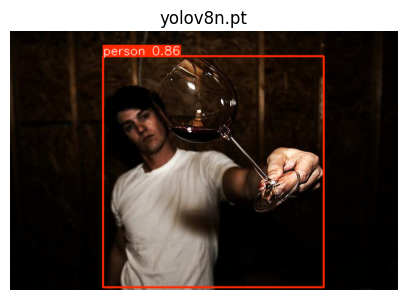


0: 448x640 1 person, 537.8ms
Speed: 3.7ms preprocess, 537.8ms inference, 3.3ms postprocess per image at shape (1, 3, 448, 640)


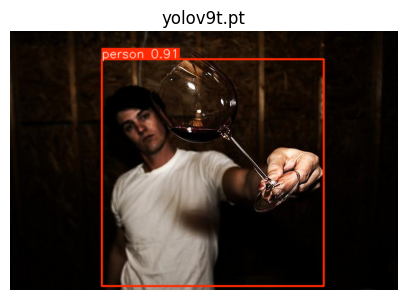


0: 448x640 1 person, 407.3ms
Speed: 4.0ms preprocess, 407.3ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


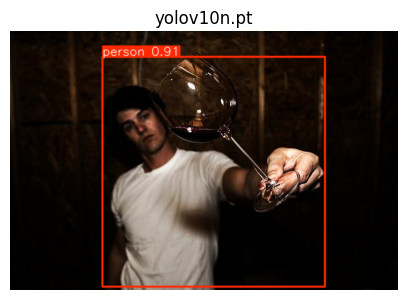


0: 448x640 1 person, 1 baseball bat, 437.6ms
Speed: 3.0ms preprocess, 437.6ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)


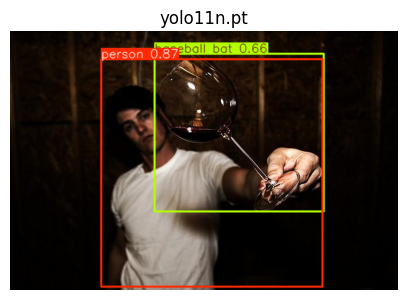


0: 448x640 1 person, 1 tennis racket, 492.7ms
Speed: 5.5ms preprocess, 492.7ms inference, 4.5ms postprocess per image at shape (1, 3, 448, 640)


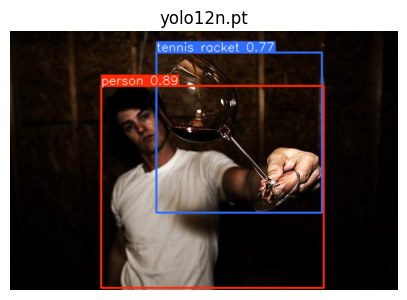

In [238]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 이번 시간에 사용할 YOLO 모델들 정의
models = [
    "yolov8n.pt",
    "yolov9t.pt",
    "yolov10n.pt",
    "yolo11n.pt",
    "yolo12n.pt"
]

############################################
# coco128 데이터 셋에 있는 와인잔 이미지 입니다 #
############################################
filename = r"coco128\images\train2017\000000000326.jpg"

# 이미지 불러오기
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 각 모델별 추론 실행
for weight in models:
    model = YOLO(weight)        # 모델 불러오기
    results = model(img_rgb)    # 추론
    
    # 결과 시각화
    res_plotted = results[0].plot()  # 결과 그리기
    plt.figure(figsize=(5, 5))
    plt.imshow(res_plotted)
    plt.axis("off")
    plt.title(weight)
    plt.show()


### 이미지 변환 후 인식 결과
- 우선 이미지는 와인잔을 중심으로 정사각형이 되게 자릅니다
- 이미지 회전을 통해 기울어진 와인잔을 세웁니다

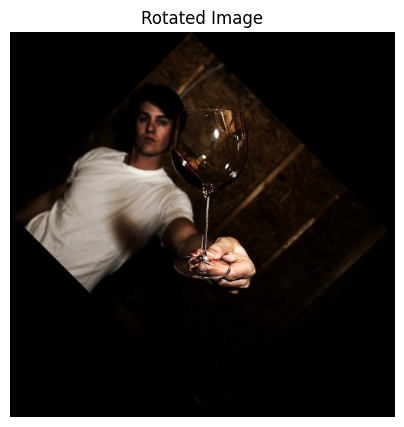

In [247]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이 부분을 변경하면서 이미지를 자르고 회전시켜봅니다
left, top, right, bottom = 150, 0, 630, 480
angle_deg = 45

filename = r"coco128\images\train2017\000000000326.jpg"
img = cv2.imread(filename)

# 행 성분은 top부터 bottom까지, 열 성분은 left부터 right까지 부분행렬을 가져옵니다
# 이미지를 행렬이기 때문에 이것이 이미지를 자르는 것이 됩니다
cropped_img = img[top:bottom, left:right]

h, w, c = cropped_img.shape

angle_rad = np.deg2rad(angle_deg)

# 회전행렬
R = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad), np.cos(angle_rad)]
])

cos_theta = R[0][0]
sin_theta = R[1][0]

# 회전된 이미지의 새로운 너비와 높이를 구합니다
new_w = int(abs(w * cos_theta) + abs(h * sin_theta))
new_h = int(abs(h * cos_theta) + abs(w * sin_theta))

# 원본 이미지의 중심점
ox, oy = w / 2, h / 2

# 회전된 이미지의 중심점
nx, ny = new_w / 2, new_h / 2

# Prepare empty output image
rotated_cropped_img = np.zeros((new_h, new_w, c), dtype=cropped_img.dtype)

# 이미지의 각 픽셀별로 회전행렬을 적용합니다
for y in range(new_h):
    for x in range(new_w):
        tx = (x - nx) * cos_theta + (y - ny) * sin_theta + ox
        ty = -(x - nx) * sin_theta + (y - ny) * cos_theta + oy

        tx_int = int(round(tx))
        ty_int = int(round(ty))

        if 0 <= tx_int < w and 0 <= ty_int < h:
            rotated_cropped_img[y, x] = cropped_img[ty_int, tx_int]

rotated_cropped_img = cv2.cvtColor(rotated_cropped_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(rotated_cropped_img)
plt.title("Rotated Image")
plt.axis("off")
plt.show()



0: 640x640 1 person, 1 wine glass, 662.0ms
Speed: 9.3ms preprocess, 662.0ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)


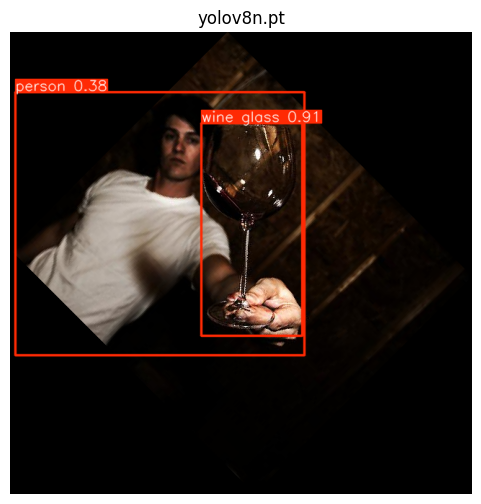


0: 640x640 1 person, 1 wine glass, 691.3ms
Speed: 11.3ms preprocess, 691.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


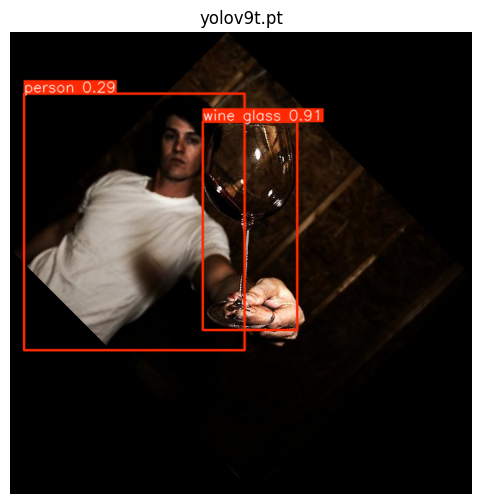


0: 640x640 2 persons, 1 wine glass, 555.2ms
Speed: 9.3ms preprocess, 555.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


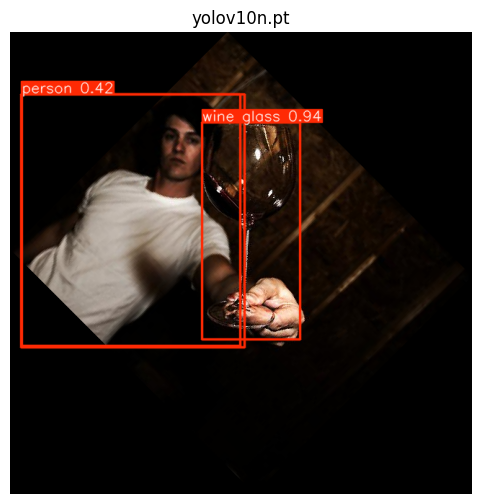


0: 640x640 1 person, 1 wine glass, 573.8ms
Speed: 8.4ms preprocess, 573.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


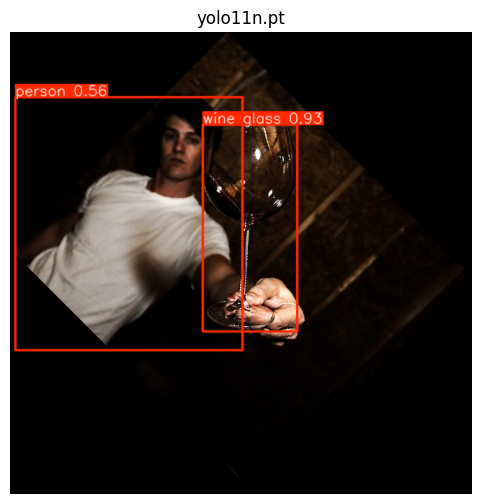


0: 640x640 1 person, 1 wine glass, 640.7ms
Speed: 8.9ms preprocess, 640.7ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


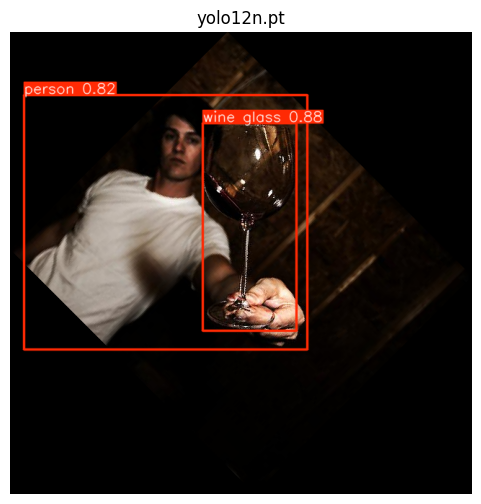

In [246]:
# 이번 시간에 사용할 YOLO 모델들 정의
models = [
    "yolov8n.pt",
    "yolov9t.pt",
    "yolov10n.pt",
    "yolo11n.pt",
    "yolo12n.pt"
]

# 각 모델별 추론 실행
for weight in models:
    model = YOLO(weight)        # 모델 불러오기
    results = model(rotated_cropped_img)    # 인식하기
    
    # 결과 시각화
    res_plotted = results[0].plot()
    plt.figure(figsize=(6, 6))
    plt.imshow(res_plotted)
    plt.axis("off")
    plt.title(weight)
    plt.show()